<a href="https://colab.research.google.com/github/visionNoob/Tensorflow_Tutorial/blob/master/Day_1/2%20-%20Logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.debugging.set_log_device_placement(True)
tf.enable_eager_execution()
tf.__version__

'1.14.0'

## Make a dataset for Logistic Regression

### Logistic Regression을 위한 Dataset을 임의로 만들어 봅시다.

* 2가지 위치에 몰려있는 데이터
* 테스트를 위한 빨간색 데이터

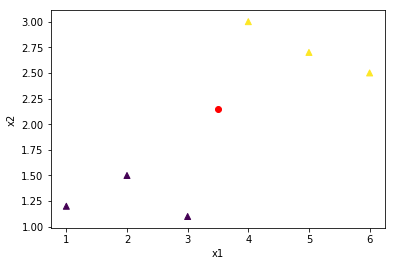

In [0]:
x_train = [[1., 1.2],
          [2., 1.5],
          [3., 1.1],
          [4., 3.],
          [5., 2.7],
          [6., 2.5]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[3.5,2.15]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## tf.data.Dataset
* 데이터를 관리해주기위한 tf function
* 각 데이터의 필요 기능들을 지원해준다.
* 데이터셋 크기가 클 경우에 메모리에 나눠올리는 기능을 지원

In [0]:
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

print(W, b)

Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomStandardNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.69984436],
       [-1.9253724 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-

## Sigmoid 함수를 가설로 선언합니다
* Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴합니다 tf.sigmoid(tf.matmul(X, W) + b)와 같습니다

## $$
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\\\\
\end{align}
$$

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [0]:
def logistic_regression(features):
    hypothesis  = tf.div(1., 1. + tf.exp(-(tf.matmul(features, W) + b)))
    return hypothesis

print(logistic_regression(x_train))

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Neg in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Exp in device /job:localhost/replica:0/task:0/device:GPU:0
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Executing op RealDiv in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[0.07325065]
 [0.08199359]
 [0.2797766 ]
 [0.01976396]
 [0.06745372]
 [0.1763089 ]], shape=(6, 1), dtype=float32)


## 가설을 검증할 Cost 함수를 정의합니다
$$
\begin{align}
cost(h(x),y) & = −log(h(x))  &  if :  &  y=1 \\\\\
cost(h(x),y) & = -log(1−h(x))  &  if :  &  y=0
\end{align}
$$

### 두 식을 한번에 쓰게되면,

$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [0]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.log(hypothesis) + \
                           (1 - labels) * tf.log(1 - hypothesis))
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [0]:
epochs = 5000

for step in range(epochs):
  for features, labels in dataset:
    with tf.GradientTape() as tape:
      loss_value = loss_fn(logistic_regression(features),labels)
      grads = tape.gradient(loss_value, [W,b])
      optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
      if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),labels)))

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNextSync in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Log in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Tile in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reciprocal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op BroadcastGradientArgs in device /job:localhost

In [0]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [0]:
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Executing op Greater in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:GPU:0
Testset Accuracy: 1.0000
